<a href="https://colab.research.google.com/github/UmitOzteker/Statictics-Projects/blob/main/%C4%B0statistik_Final_Projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [ ]:
df = pd.read_csv('Student_Performance.csv')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


**Descriptive Statistics**

In [ ]:
mean = df['Performance Index'].mean()
median = df['Performance Index'].median()
Variance = df['Performance Index'].var()
std = df['Performance Index'].std()
standard_error = df['Performance Index'].sem()

In [ ]:
print(mean)
print(median)
print(Variance)
print(std)
print(standard_error)

55.2248
55.0
369.12237719771895
19.212557799463323
0.19212557799463345


In [ ]:
Extracurricular_Activities = df['Extracurricular Activities']

In [ ]:
df.drop('Extracurricular Activities', axis=1, inplace=True)

In [ ]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


**Data Visualization**

Text(0, 0.5, 'Frequency (Number of Students)')

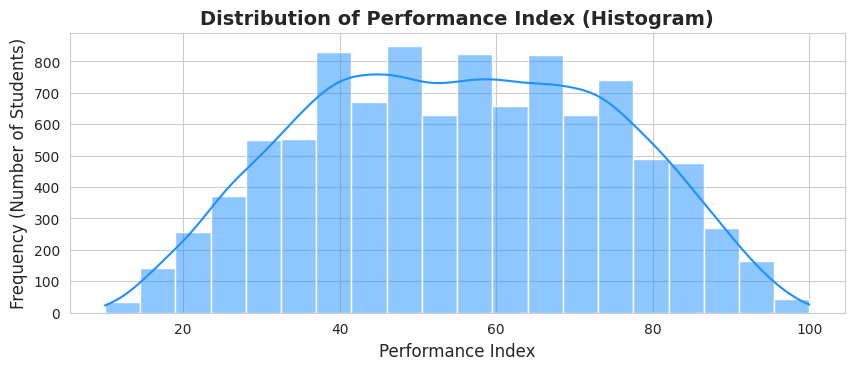

In [ ]:
# Set the visual style of the plots
sns.set_style("whitegrid")

# Set the overall figure size
plt.figure(figsize=(10, 8))

# 1. Histogram: To assess the shape of the distribution
#-----------------------------------------------------------
plt.subplot(2, 1, 1)  # The first plot in a 2-row, 1-column grid
sns.histplot(df['Performance Index'], kde=True, bins=20, color='dodgerblue')
plt.title('Distribution of Performance Index (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('Performance Index', fontsize=12)
plt.ylabel('Frequency (Number of Students)', fontsize=12)

In [ ]:
df['Extracurricular Activities'] = Extracurricular_Activities

In [ ]:
df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,7,99,9,1,91.0,Yes
1,4,82,4,2,65.0,No
2,8,51,7,2,45.0,Yes
3,5,52,5,2,36.0,Yes
4,7,75,8,5,66.0,No


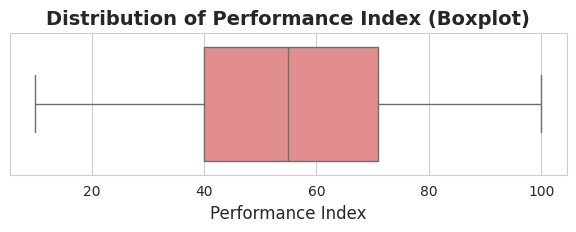

In [ ]:
plt.subplot(2, 1, 2)  # The second plot in a 2-row, 1-column grid
sns.boxplot(x=df['Performance Index'], color='lightcoral')
plt.title('Distribution of Performance Index (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('Performance Index', fontsize=12)

# Adjust the spacing between plots and display them
plt.tight_layout(pad=3.0)
plt.show()

**Confidence Intervals**

In [ ]:
# Get the sample size (n), which is the total number of records in the DataFrame.
n = len(df)

# Set the desired confidence level for the interval (e.g., 95%).
confidence_level = 0.95

# Calculate alpha, the significance level, which is 1 minus the confidence level.
alpha = 1 - confidence_level

# Calculate the degrees of freedom (df), which is typically the sample size minus one.
degree_of_freedom = n - 1

**Finding for average**

In [ ]:
# Calculate the Z-critical value for a two-tailed confidence interval.
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculate the margin of error using the formula: E = Z * (s / sqrt(n)).
margin_of_error = z_critical * (std / np.sqrt(n))

# Construct the confidence interval by adding and subtracting the margin of error
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print(f"The 95% confidence interval for the mean is: {confidence_interval}")

The 95% confidence interval for the mean is: (np.float64(54.84824078662158), np.float64(55.60135921337842))


**Finding For Variance**

In [ ]:
# Calculate the lower-tail critical value from the Chi-Square distribution.
chi2_lower = stats.chi2.ppf(alpha / 2, degree_of_freedom)       # Sol kuyruk alpha/2

# Calculate the upper-tail critical value from the Chi-Square distribution.
chi2_upper = stats.chi2.ppf(1 - alpha / 2, degree_of_freedom)   # Sağ kuyruk alpha/2

# Construct the confidence interval for the population variance using the formula
variance_interval = (((n - 1) * Variance) / chi2_upper, ((n - 1) * Variance) / chi2_lower )

print(f"Confidence Interval for the Variance: {variance_interval}")

Confidence Interval for the Variance: (np.float64(359.1004499873884), np.float64(379.57181045670353))


**Sample Size Estimation**

In [ ]:
    E = 0.1  # Maximum Desired Margin of Error
    confidence_level = 0.90

    # Calculate Z-score
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

    # Calculate Sample Standard Deviation
    s = df['Performance Index'].std()

    # Applying the Formula
    n_raw = (z_score * s / E) ** 2

    # Round Up Result
    required_sample_size = math.ceil(n_raw)

    print("--- Sample Size Calculation ---")
    print(f"Desired Confidence Level: {confidence_level:.0%}")
    print(f"Corresponding Z-score (Z): {z_score:.3f}")
    print(f"Desired Maximum Margin of Error (E): {E}")
    print(f"Standard Deviation from Data (s): {s:.4f}")
    print("-" * 45)
    print(f"Calculated Raw Sample Size (n_raw): {n_raw:.2f}")
    print(f"Required Minimum Sample Size (Rounded Up): {required_sample_size}")
    print("-" * 45)

--- Sample Size Calculation ---
Desired Confidence Level: 90%
Corresponding Z-score (Z): 1.645
Desired Maximum Margin of Error (E): 0.1
Standard Deviation from Data (s): 19.2126
---------------------------------------------
Calculated Raw Sample Size (n_raw): 99867.66
Required Minimum Sample Size (Rounded Up): 99868
---------------------------------------------


**Hypothesis Testing**

In [ ]:
# Separate the data into two groups: those who participate in activities and those who do not.
activities_yes = df[df['Extracurricular Activities'] == 'Yes']['Performance Index']
activities_no = df[df['Extracurricular Activities'] == 'No']['Performance Index']

# Perform the independent two-sample t-test.
t_statistic, p_value = stats.ttest_ind(activities_yes, activities_no)

# Also, calculate the means of the groups for comparison.
mean_yes = activities_yes.mean()
mean_no = activities_no.mean()

# Significance level
alpha = 0.05

# Decision mechanism
if p_value < alpha:
    decision = "Reject H₀."
else:
    decision = "Fail to reject H₀."

print("--- Independent Two-Sample T-Test Results ---")
print("H₀: µ_activities_yes = µ_activities_no")
print("Hₐ: µ_activities_yes ≠ µ_activities_no")
print("-" * 55)
print(f"Mean Performance for Students with Activities: {mean_yes:.2f}")
print(f"Mean Performance for Students without Activities: {mean_no:.2f}")
print("-" * 55)
print(f"Calculated T-Statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level (Alpha): {alpha}")
print("-" * 55)
print(f"Decision: {decision}")
print("-" * 55)

--- Independent Two-Sample T-Test Results ---
H₀: µ_activities_yes = µ_activities_no
Hₐ: µ_activities_yes ≠ µ_activities_no
-------------------------------------------------------
Mean Performance for Students with Activities: 55.70
Mean Performance for Students without Activities: 54.76
-------------------------------------------------------
Calculated T-Statistic: 2.4530
P-value: 0.0142
Significance Level (Alpha): 0.05
-------------------------------------------------------
Decision: Reject H₀.
-------------------------------------------------------
